# Import libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import datasets

In [3]:
# Creating string of project folder path
path = r'C:\Users\augus\Documents\01-2026 Instacart Basket Analysis' 

In [4]:
# importing the final merged  data set
df_final_cfo = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'orders_products_customers_cfo_profile.pkl'))

In [5]:
df_final_cfo.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spend_flag', 'order_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'no_of_dependents',
       'marital_status', 'income', 'region', 'low_activity_flag', 'profile',
       'department_name'],
      dtype='object')

# Question 1: The sales team needs to know what the busiest days of the week and hours of theday are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

#### Required visualizations to answer this question is already generated as part of Excercise 4.9

# Question 2: They also want to kno wwhether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

#### Required visualizations to answer this question is already generated as part of Excercise 4.9

# Question 3:Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [5]:
# checking frequency of price_range_loc column
df_final_cfo['price_range_loc'].value_counts(dropna=False)

price_range_loc
Mid-range product     20896648
Low-range product      9674840
High-range product      393076
Name: count, dtype: int64

In [4]:
# Creating a subset with required columns
df_3 = df_final_cfo[['product_id','prices','price_range_loc']]

In [10]:
df_3.shape

(30964564, 3)

In [5]:
# Dropping duplicate product_id's since there are multiple rows with same product's
df_3_final = df_3.drop_duplicates("product_id")

In [14]:
df_3_final.shape

(49628, 3)

In [6]:
# checking frequency of price_range_loc
df_3_final['price_range_loc'].value_counts(dropna=False)

price_range_loc
Mid-range product     32804
Low-range product     16279
High-range product      545
Name: count, dtype: int64

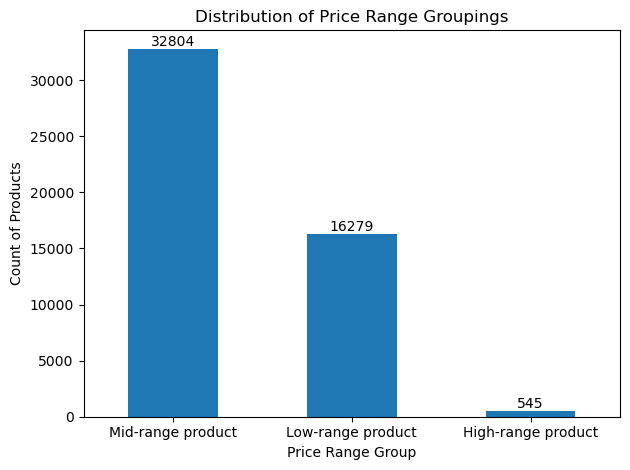

In [9]:
# Bar chart of price range groupings. 
bar_price_range = df_3_final['price_range_loc'].value_counts().plot.bar()
                                                                                 
plt.title('Distribution of Price Range Groupings')
plt.xlabel('Price Range Group')
plt.xticks(rotation=0)
plt.ylabel('Count of Products')
bar_price_range.bar_label(bar_price_range.containers[0])
plt.tight_layout()

In [ ]:
# Export bar chart
bar_price_range.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_price_range.png'))

# Question 4: Aretherecertain types of products that are more popular than others? The marketingand sales teams want to know which departments have the highest frequency of product orders.

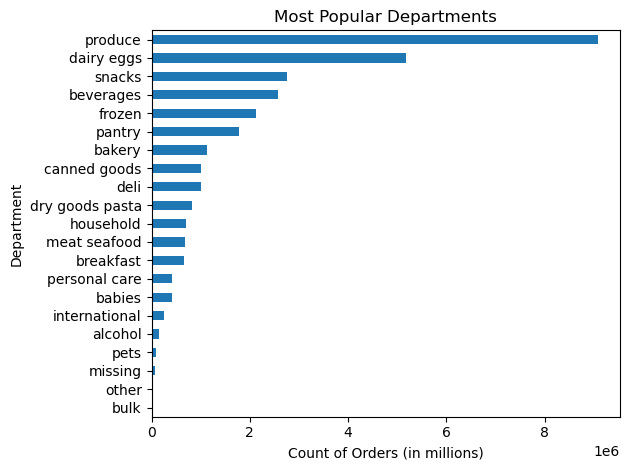

In [7]:
# Bar chart of departments by order count. 

bar_pop_dept = df_final_cfo['department_name'].value_counts().sort_values().plot(kind = 'barh')

plt.title('Most Popular Departments')
plt.xlabel('Count of Orders (in millions)')
plt.ylabel('Department')


plt.tight_layout()
bar_pop_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_popular_dept.png'))

# Question 5a:  What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [8]:
df_final_cfo['frequency_flag'].value_counts(dropna=False)

frequency_flag
Frequent customer        21204476
Regular customer          6865113
Non-frequent customer     2894975
Name: count, dtype: int64

In [9]:
# Dropping duplicate user_id's since there are multiple rows for the same user
df_5a=df_final_cfo.drop_duplicates("user_id")

In [10]:
# creating dataframe with required columns 
df_5a_final=df_5a[['user_id','frequency_flag','order_frequency']]

In [36]:
df_5a_final.shape

(162631, 3)

In [38]:
df_5a_final['frequency_flag'].value_counts(dropna=False)

frequency_flag
Frequent customer        75927
Regular customer         50039
Non-frequent customer    36665
Name: count, dtype: int64

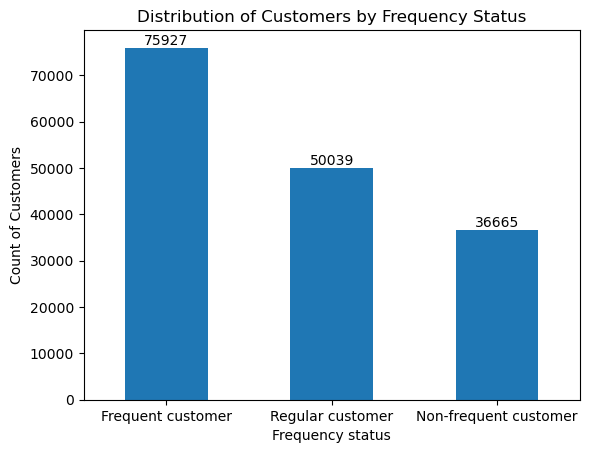

In [11]:
#Creating loyalty flag bar chart
bar_loyalty_flag = df_5a_final['frequency_flag'].value_counts().plot.bar()
# Title 
plt.title ('Distribution of Customers by Frequency Status')
# labels
plt.xlabel ('Frequency status')
plt.ylabel ('Count of Customers')
plt.xticks(rotation=0)
bar_loyalty_flag.bar_label(bar_loyalty_flag.containers[0])
bar_loyalty_flag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [41]:
frequency_agg = (
    df_5a_final.groupby("frequency_flag")
      .agg(
          min_order_frequency=("order_frequency", "min"),
          mean_order_frequency=("order_frequency", "mean"),
          max_order_frequency=("order_frequency", "max"),
      )
      .reset_index()
)

In [42]:
frequency_agg

,frequency_flag,min_order_frequency,mean_order_frequency,max_order_frequency
0,Frequent customer,0.0,6.741772,10.0
1,Non-frequent customer,20.5,27.085231,30.0
2,Regular customer,10.5,14.657427,20.0


# Question 5b:Are there differences in ordering habits based on a customer’s loyalty status?

In [12]:
# creating dataframe with required columns 
df_5b=df_5a[['user_id','frequency_flag','order_frequency','max_order']]

In [13]:
order_agg = (
    df_5b.groupby("frequency_flag")
      .agg(
          min_number_of_orders=("max_order", "min"),
          mean_number_of_orders=("max_order", "mean"),
          max_number_of_orders=("max_order", "max"),
      )
      .reset_index()
)

In [14]:
order_agg

,frequency_flag,min_number_of_orders,mean_number_of_orders,max_number_of_orders
0,Frequent customer,5,27.742832,99
1,Non-frequent customer,5,8.051275,25
2,Regular customer,5,13.247747,45


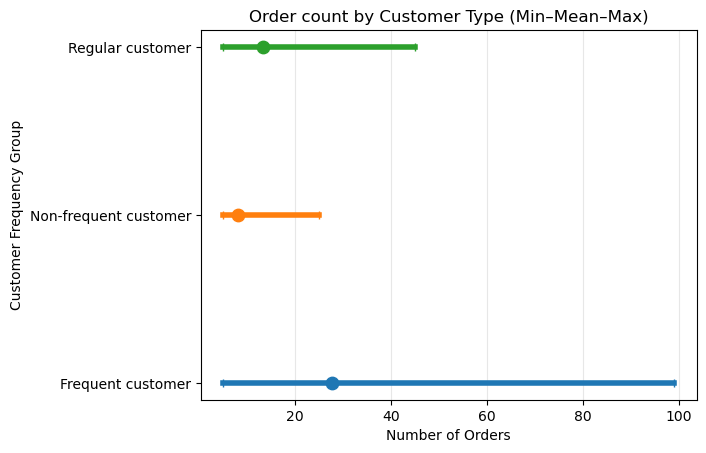

In [15]:
# Generating vizualization
ax = plt.gca()

for i, row in order_agg.iterrows():
    # min to max line
    plt.plot([row["min_number_of_orders"], row["max_number_of_orders"]],
             [row["frequency_flag"], row["frequency_flag"]],
             marker='|', linewidth=4)
    
    # mean dot
    plt.scatter(row["mean_number_of_orders"], row["frequency_flag"], s=80)

plt.title("Order count by Customer Type (Min–Mean–Max)")
plt.xlabel("Number of Orders")
plt.ylabel("Customer Frequency Group")
plt.grid(axis="x", alpha=0.3)
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Order count by Customer Type (Min–Mean–Max).png'), dpi=300, bbox_inches='tight')
plt.show()

# Question 5c: Are there differences in ordering habits based on a customer’s region?

#### Required visualizations to answer this question is already generated as part of Excercise 4.10

# Question 5d: Is there aconnection between age and family status in terms of ordering habits?

#### Required visualizations to answer this question is already generated as part of Excercise 4.9

# Question 5e :What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

#### Required visualizations to answer this question is already generated as part of Excercise 4.10

# Question 5f: What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of

#### Required visualizations to answer this question is already generated as part of Excercise 4.10